In [11]:
import os

print(os.getcwd())

C:\Users\Cristina Jorge\OneDrive\Documentos\GitHub\corinthians-data-analysis


In [19]:
import pandas as pd

file_path = 'data/csv/brasileiro/campeonato_brasileiro_1971_1976.csv'
df = pd.read_csv(file_path)
file_path = 'data/robertao_1967_1970.csv'
df2 = pd.read_csv(file_path)
df2

,Unnamed: 0,Comp,Temp,Data,Casa,GC,GF,Fora,Res,PC,PF,J
0,0,Robertão,1967,1967-03-05,Fluminense,2,4,Palmeiras,VV,0,3,1
1,1,Robertão,1967,1967-03-05,Cruzeiro,4,0,Atlético-MG,VC,3,0,2
2,2,Robertão,1967,1967-03-05,Portuguesa,1,2,Flamengo,VV,0,3,3
3,3,Robertão,1967,1967-03-05,Ferroviário-CE,1,1,Bangu,E,1,1,4
4,4,Robertão,1967,1967-03-05,Internacional,2,0,Grêmio,VC,3,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
538,135,Robertão,1970,1970-12-06,Ahtletico-PR,1,1,Fluminense,E,1,1,136
539,136,Robertão,1970,1970-12-13,Fluminense,1,0,Palmeiras,VC,3,0,137
540,137,Robertão,1970,1970-12-13,Cruzeiro,1,1,Atlético-MG,E,1,1,138
541,138,Robertão,1970,1970-12-16,Cruzeiro,0,1,Fluminense,VV,0,3,139


In [20]:
del df2['Unnamed: 0']
df2

,Comp,Temp,Data,Casa,GC,GF,Fora,Res,PC,PF,J
0,Robertão,1967,1967-03-05,Fluminense,2,4,Palmeiras,VV,0,3,1
1,Robertão,1967,1967-03-05,Cruzeiro,4,0,Atlético-MG,VC,3,0,2
2,Robertão,1967,1967-03-05,Portuguesa,1,2,Flamengo,VV,0,3,3
3,Robertão,1967,1967-03-05,Ferroviário-CE,1,1,Bangu,E,1,1,4
4,Robertão,1967,1967-03-05,Internacional,2,0,Grêmio,VC,3,0,5
...,...,...,...,...,...,...,...,...,...,...,...
538,Robertão,1970,1970-12-06,Ahtletico-PR,1,1,Fluminense,E,1,1,136
539,Robertão,1970,1970-12-13,Fluminense,1,0,Palmeiras,VC,3,0,137
540,Robertão,1970,1970-12-13,Cruzeiro,1,1,Atlético-MG,E,1,1,138
541,Robertão,1970,1970-12-16,Cruzeiro,0,1,Fluminense,VV,0,3,139


In [21]:
# Merge dataframes and sort by date
frames = [df, df2]
df = pd.concat(frames)
df = df.drop_duplicates()
df['Data'] = pd.to_datetime(df['Data'], infer_datetime_format=True, errors='coerce')
df = df.sort_values(by='Data')



C:\Users\Cristina Jorge\AppData\Local\Temp\ipykernel_13068\1807575354.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Data'] = pd.to_datetime(df['Data'], infer_datetime_format=True, errors='coerce')


In [23]:
df

,Comp,Temp,Data,Casa,GC,GF,Fora,Res,PC,PF,J
1,Robertão,1967,1967-03-05,Cruzeiro,4,0,Atlético-MG,VC,3,0,2
0,Robertão,1967,1967-03-05,Fluminense,2,4,Palmeiras,VV,0,3,1
2,Robertão,1967,1967-03-05,Portuguesa,1,2,Flamengo,VV,0,3,3
4,Robertão,1967,1967-03-05,Internacional,2,0,Grêmio,VC,3,0,5
3,Robertão,1967,1967-03-05,Ferroviário-CE,1,1,Bangu,E,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...
2504,Série A,1976,1976-11-28,Caxias,1,0,Ponte Preta,VC,3,0,403
2505,Série A,1976,1976-11-28,Internacional,3,0,Portuguesa,VC,3,0,404
2508,Série A,1976,1976-12-05,Internacional,2,1,Atlético-MG,VC,3,0,409
2509,Série A,1976,1976-12-05,Fluminense,1,1,Corinthians,E,1,1,408


In [22]:
import pandas as pd

def update_team_stats(df):
    team_stats = {}

    for index, row in df.iterrows():
        home_team, away_team = row['Casa'], row['Fora']
        result = row['Res']

        # Update home team stats
        team_stats.setdefault(home_team, {'Jogos': 0, 'Vitórias': 0, 'Derrotas': 0, 'Empates': 0, 'Gols': 0, 'Pontos': 0})
        team_stats[home_team]['Jogos'] += 1
        team_stats[home_team]['Gols'] += row['GC']

        if result == 'VC':
            team_stats[home_team]['Vitórias'] += 1
            team_stats[home_team]['Pontos'] += 2
        elif result == 'VV':
            team_stats[home_team]['Derrotas'] += 1
        else:
            team_stats[home_team]['Empates'] += 1
            team_stats[home_team]['Pontos'] += 1

        # Update away team stats
        team_stats.setdefault(away_team, {'Jogos': 0, 'Vitórias': 0, 'Derrotas': 0, 'Empates': 0, 'Gols': 0, 'Pontos': 0})
        team_stats[away_team]['Jogos'] += 1
        team_stats[away_team]['Gols'] += row['GF']

        if result == 'VC':
            team_stats[away_team]['Derrotas'] += 1
        elif result == 'VV':
            team_stats[away_team]['Vitórias'] += 1
            team_stats[away_team]['Pontos'] += 2
        else:
            team_stats[away_team]['Empates'] += 1
            team_stats[away_team]['Pontos'] += 1

    # Create a DataFrame with team statistics
    team_stats_df = pd.DataFrame.from_dict(team_stats, orient='index').reset_index()
    team_stats_df = team_stats_df.rename(columns={'index': 'Time', 'Jogos': 'Partidas', 'Vitórias': 'Vitórias', 'Derrotas': 'Derrotas',
                                                  'Empates': 'Empates', 'Gols': 'Gols Marcados', 'Pontos': 'Pontuação'})

    # Calculating the percentage of victories, draws, and losses
    team_stats_df['Percentual Vitórias'] = (team_stats_df['Vitórias'] / team_stats_df['Partidas']) * 100
    team_stats_df['Percentual Empates'] = (team_stats_df['Empates'] / team_stats_df['Partidas']) * 100
    team_stats_df['Percentual Derrotas'] = (team_stats_df['Derrotas'] / team_stats_df['Partidas']) * 100

    # Calculating the percentage of total points based on the maximum possible points
    max_possible_points = team_stats_df['Partidas'] * 2
    team_stats_df['Aproveitamento'] = (team_stats_df['Pontuação'] / max_possible_points) * 100
    team_stats_df = team_stats_df.sort_values(by='Aproveitamento', ascending=False)

    return team_stats_df

team_stats_df = update_team_stats(df)
print(team_stats_df)

file_path_csv = '../corinthians-data-analysis/data/csv/estatisticas_brasileirao_1971_1976.csv'
file_path_json = '../corinthians-data-analysis/data/json/estatisticas_brasileirao_1971_1976.json'


team_stats_df.to_csv(file_path_csv, index=False)
team_stats_df.to_json(file_path_json, orient='records')


              Time  Partidas  Vitórias  Derrotas  Empates  Gols Marcados  \
3        Palmeiras       243       120        43       80            330   
6    Internacional       245       121        45       79            352   
0         Cruzeiro       228       105        46       77            311   
12     Corinthians       236       108        54       74            295   
7           Grêmio       231        99        56       76            256   
..             ...       ...       ...       ...      ...            ...   
57           Treze        12         3         9        0              9   
36      Moto Clube        42         2        25       15             24   
32         Sergipe        69         8        47       14             36   
8   Ferroviário-CE        14         0        10        4              9   
53      Campinense        16         0        12        4             13   

    Pontuação  Percentual Vitórias  Percentual Empates  Percentual Derrotas  \
3       

,Time,Partidas,Vitórias,Derrotas,Empates,Gols Marcados,Pontuação,Percentual Vitórias,Percentual Empates,Percentual Derrotas,Aproveitamento
3,Palmeiras,243,120,43,80,330,320,49.382716,32.921811,17.695473,65.843621
6,Internacional,245,121,45,79,352,321,49.387755,32.244898,18.367347,65.510204
0,Cruzeiro,228,105,46,77,311,287,46.052632,33.771930,20.175439,62.938596
12,Corinthians,236,108,54,74,295,290,45.762712,31.355932,22.881356,61.440678
7,Grêmio,231,99,56,76,256,274,42.857143,32.900433,24.242424,59.307359
11,Santos,211,91,53,67,303,249,43.127962,31.753555,25.118483,59.004739
1,Atlético-MG,222,94,59,69,309,257,42.342342,31.081081,26.576577,57.882883
45,Guarani,108,39,27,42,127,120,36.111111,38.888889,25.000000,55.555556
14,São Paulo,221,77,57,87,271,241,34.841629,39.366516,25.791855,54.524887
19,Coritiba,171,72,57,42,189,186,42.105263,24.561404,33.333333,54.385965


In [24]:
filt = (team_stats_df['Partidas'] > 100)
team_stats_df = team_stats_df[filt]

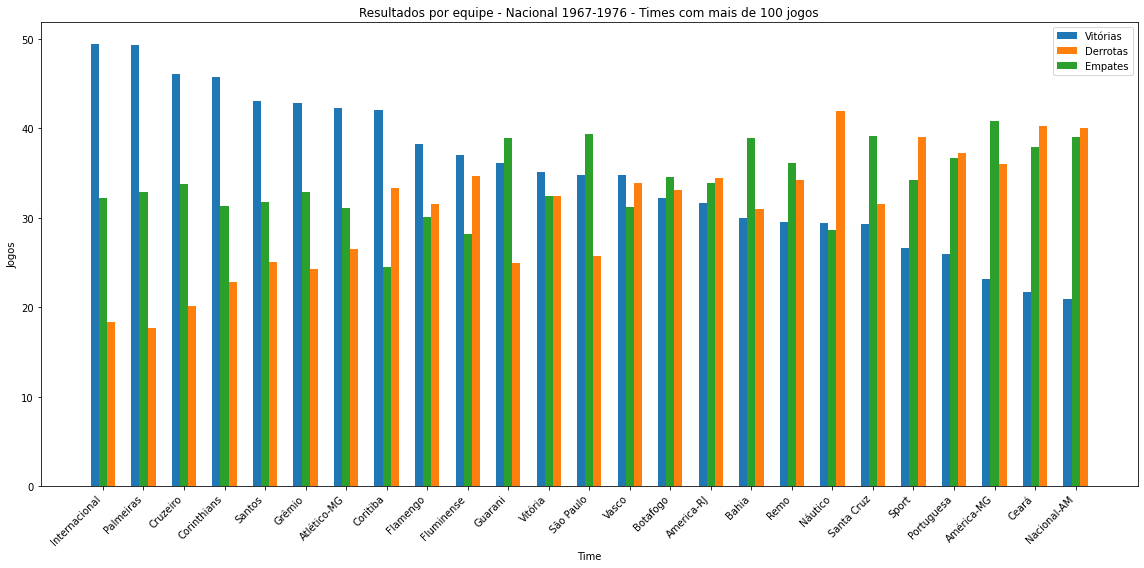

In [36]:
import matplotlib.pyplot as plt

# Assuming team_stats_df is your DataFrame

# Sort the DataFrame by 'Percentual Vitórias' in descending order
team_stats_df = team_stats_df.sort_values(by='Percentual Vitórias', ascending=False)

teams = team_stats_df['Time']
victories = team_stats_df['Percentual Vitórias']
draws = team_stats_df['Percentual Empates']
losses = team_stats_df['Percentual Derrotas']

# Plotting a bar chart
fig, ax = plt.subplots(figsize=(16, 8))

bar_width = 0.2
index = range(len(teams))

bar1 = ax.bar(index, victories, bar_width, label='Vitórias')
bar2 = ax.bar([i + 2 * bar_width for i in index], losses, bar_width, label='Derrotas')
bar3 = ax.bar([i + bar_width for i in index], draws, bar_width, label='Empates')

# Adding labels, title, and legend
ax.set_xlabel('Time')
ax.set_ylabel('Jogos')
ax.set_title('Resultados por equipe - Nacional 1967-1976 - Times com mais de 100 jogos')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(teams, rotation=45, ha='right')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

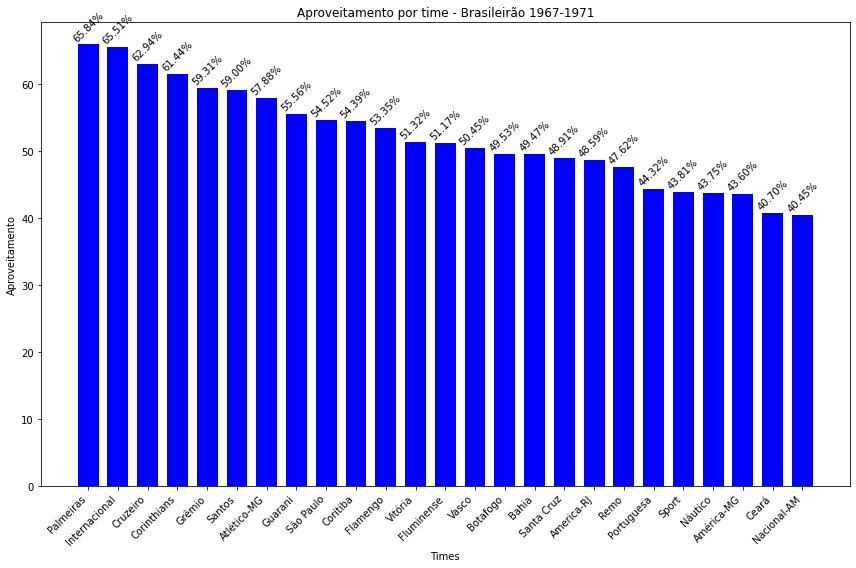

In [38]:
teams = team_stats_df['Time']
victory_percentage = team_stats_df['Aproveitamento']

# Sort teams by the percentage of victories
sorted_indices = victory_percentage.argsort()[::-1]
sorted_teams = teams.iloc[sorted_indices]
sorted_percentages = victory_percentage.iloc[sorted_indices]

# Plotting a bar chart
fig, ax = plt.subplots(figsize=(12, 8))  # Increase figsize for more spacing

bar_width = 0.7  # Increase bar_width for more spacing
index = range(len(sorted_teams))

# Change the color to blue
bars = ax.bar(index, sorted_percentages, bar_width, color='blue')

# Adding labels, title, and legend
ax.set_xlabel('Times')
ax.set_ylabel('Aproveitamento')
ax.set_title('Aproveitamento por time - Brasileirão 1967-1971')
ax.set_xticks(index)
ax.set_xticklabels(sorted_teams, rotation=45, ha='right')

# Display the percentages on top of the bars with rotation
for bar, percentage in zip(bars, sorted_percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{percentage:.2f}%', ha='center', rotation=45)

# Display the plot
plt.tight_layout()
plt.show()